![](https://raw.githubusercontent.com/Qinbf/tf-model-zoo/master/README_IMG/01.jpg)
AI MOOC： **www.ai-xlab.com**  
如果你也是AI爱好者，可以添加我的微信一起交流：**sdxxqbf**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pregnancies：怀孕次数  
Glucose：葡萄糖测试值  
BloodPressure：血压  
SkinThickness：皮肤厚度  
Insulin：胰岛素  
BMI：身体质量指数  
DiabetesPedigreeFunction：糖尿病遗传函数  
Age：年龄  
Outcome：糖尿病标签

In [9]:
# 载入数据
#diabetes_data = pd.read_csv('diabetes.csv')
#diabetes_data.head()

diabetes_data = np.genfromtxt("diabete.txt",delimiter=",")
diabetes_data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [30]:
# 数据信息
#diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 数据描述
#diabetes_data.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [5]:
# 数据形状
diabetes_data.shape

(768, 9)

In [6]:
# 查看标签分布
print(diabetes_data.Outcome.value_counts())
# 使用柱状图的方式画出标签个数统计
p=diabetes_data.Outcome.value_counts().plot(kind="bar")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'Outcome'

In [7]:
# 可视化数据分布
p=sns.pairplot(diabetes_data, hue = 'Outcome')
plt.show()

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

这里画的图主要是两种类型，直方图和散点图。单一特征对比的时候用的是直方图，不同特征对比的时候用的是散点图，显示两个特征的之间的关系。观察数据分布我们可以发现一些异常值，比如Glucose葡萄糖，BloodPressure血压，SkinThickness皮肤厚度，Insulin胰岛素，BMI身体质量指数这些特征应该是不可能出现0值的。

In [38]:
# 把葡萄糖，血压，皮肤厚度，胰岛素，身体质量指数中的0替换为nan
colume = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)

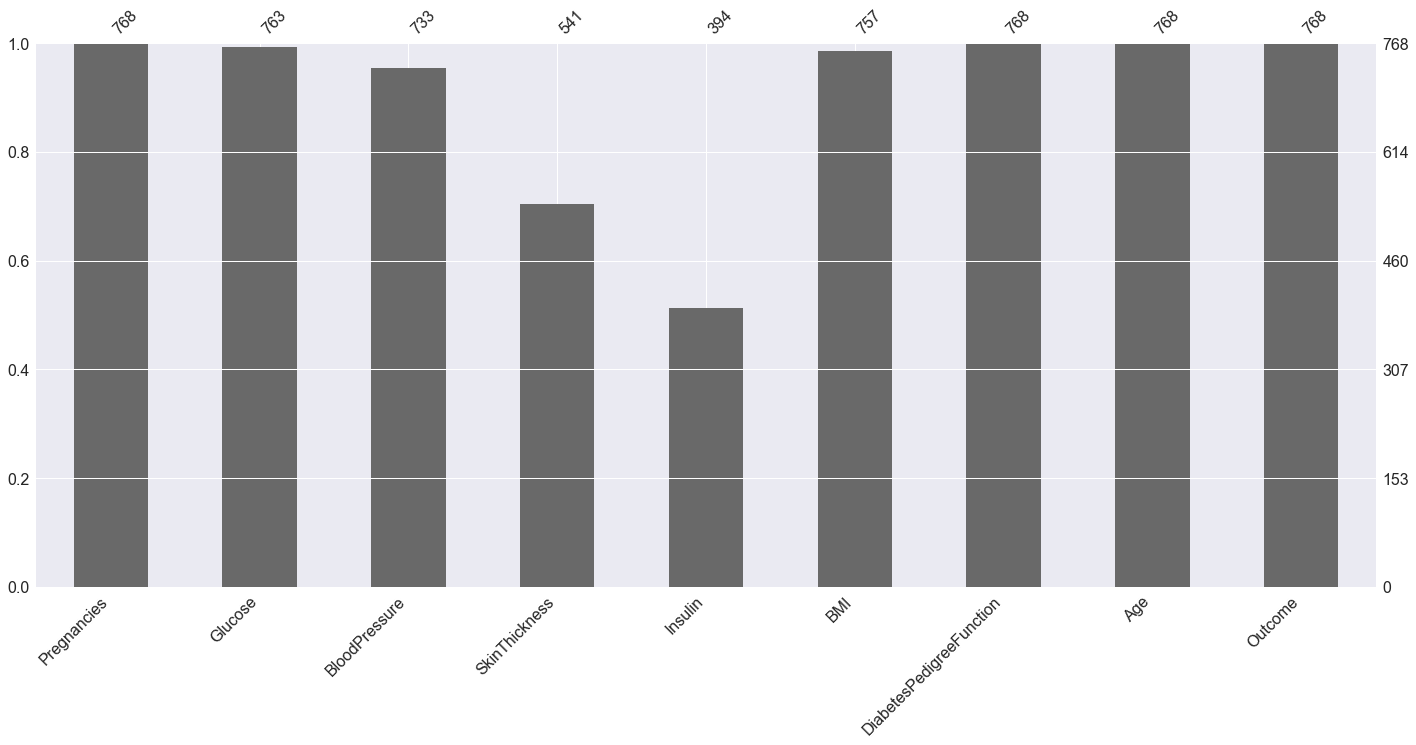

In [39]:
# pip install missingno
import missingno as msno
p=msno.bar(diabetes_data)
plt.show()

In [40]:
# 设定阀值
thresh_count = diabetes_data.shape[0]*0.8
# 若某一列数据缺失的数量超过20%就会被删除
diabetes_data = diabetes_data.dropna(thresh=thresh_count, axis=1) 

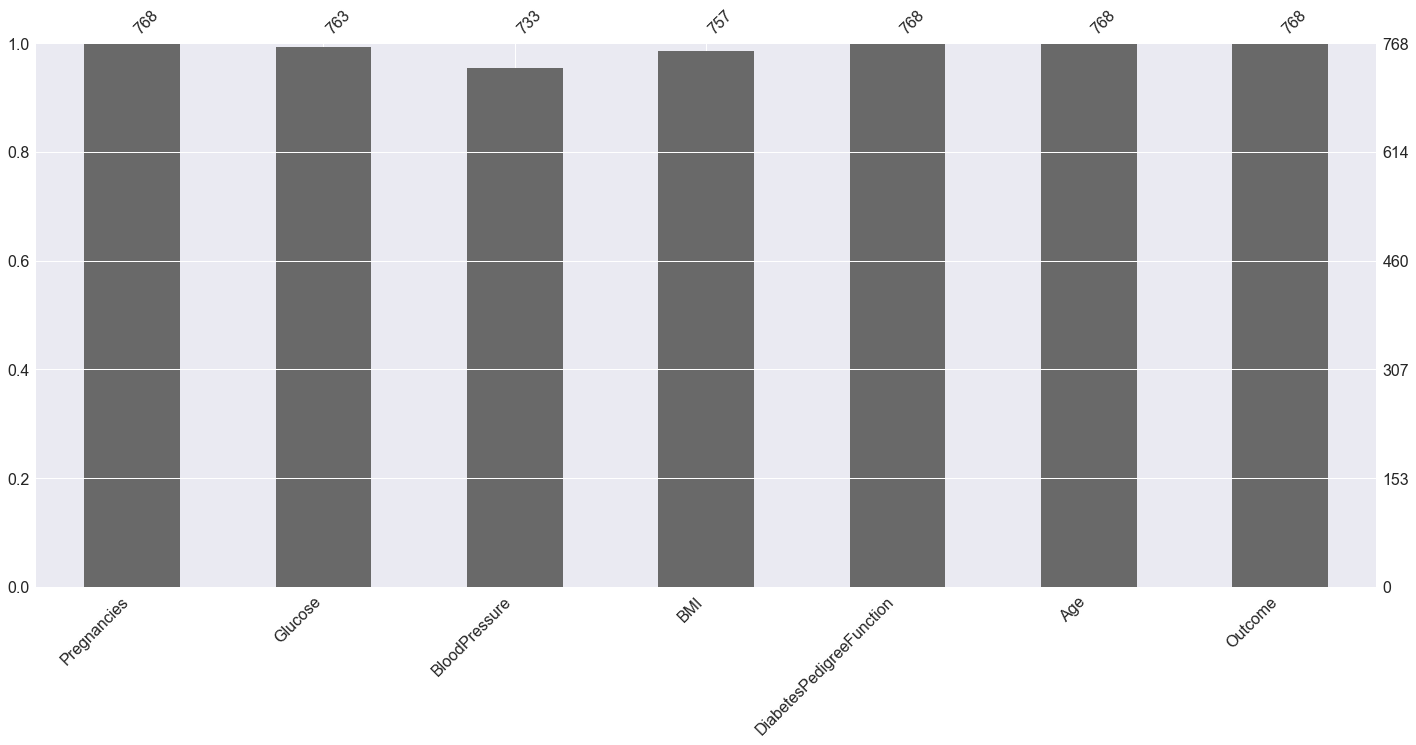

In [41]:
p=msno.bar(diabetes_data)
plt.show()

In [42]:
# 导入插补库
from sklearn.preprocessing import Imputer 
# 对数值型变量的缺失值，我们采用均值插补的方法来填充缺失值
imr = Imputer(missing_values='NaN', strategy='mean', axis=0) 
colume =  ['Glucose', 'BloodPressure', 'BMI']
# 进行插补
diabetes_data[colume] = imr.fit_transform(diabetes_data[colume]) 

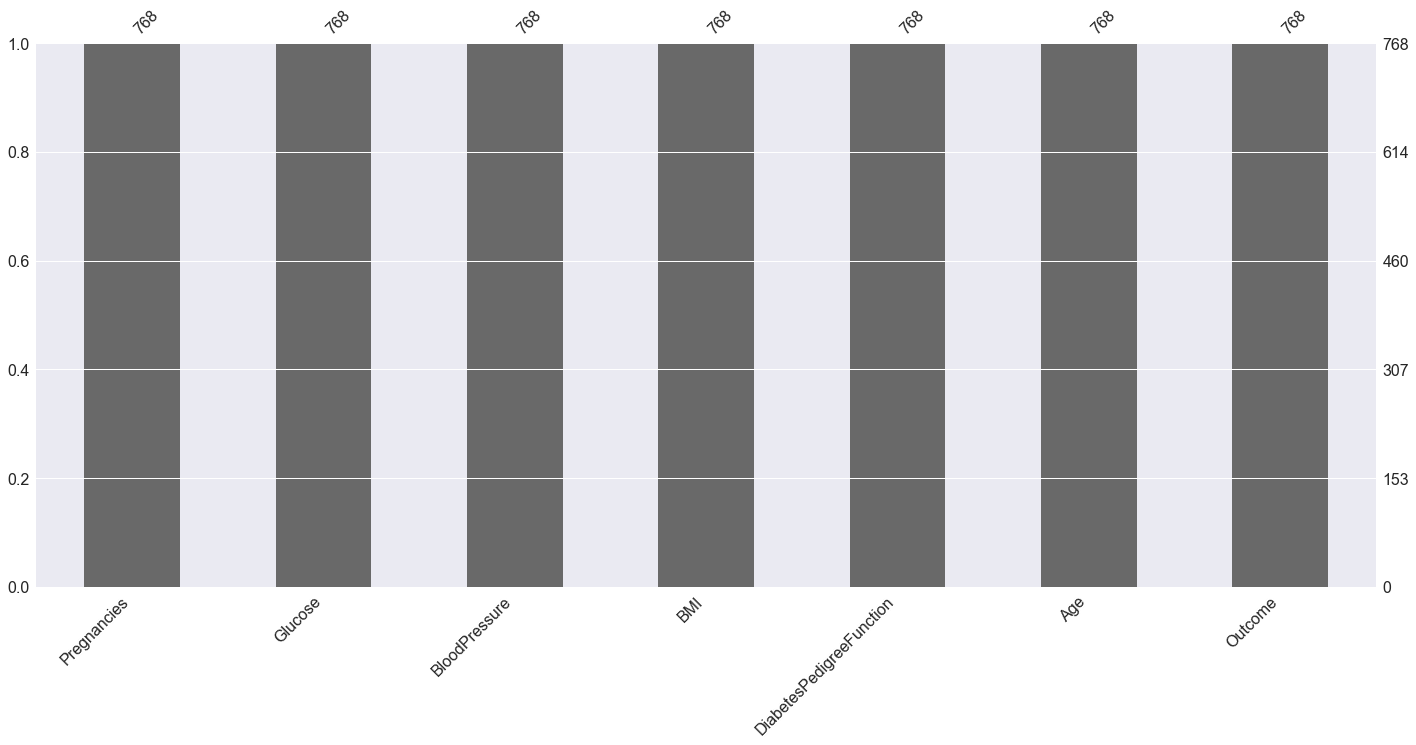

In [43]:
p=msno.bar(diabetes_data)
plt.show()

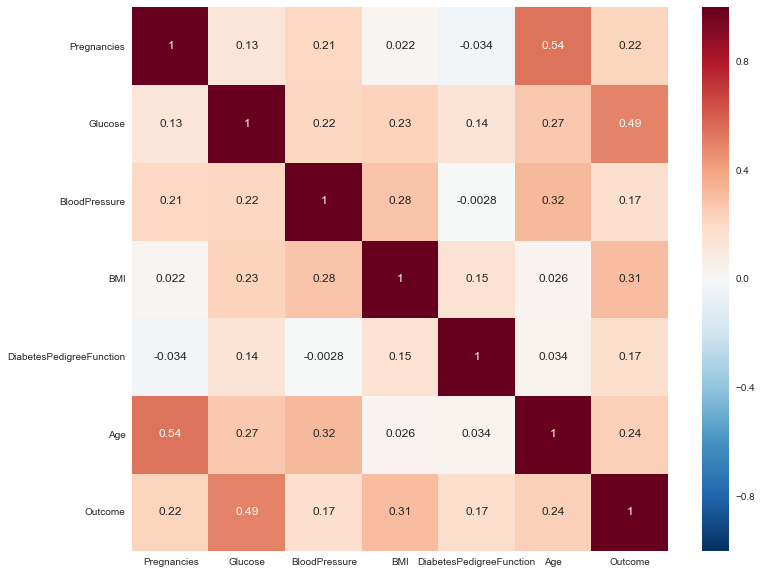

In [44]:
plt.figure(figsize=(12,10))  
# 画热力图，数值为两个变量之间的相关系数
p=sns.heatmap(diabetes_data.corr(), annot=True) 
plt.show()

In [45]:
# 把数据切分为特征x和标签y
x = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [46]:
from sklearn.model_selection import train_test_split
# 切分数据集，stratify=y表示切分后训练集和测试集中的数据类型的比例跟切分前y中的比例一致
# 比如切分前y中0和1的比例为1:2，切分后y_train和y_test中0和1的比例也都是1:2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,y_train)

predictions = LR.predict(x_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86       150
          1       0.82      0.56      0.66        81

avg / total       0.80      0.80      0.79       231

